In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("gene_expression.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


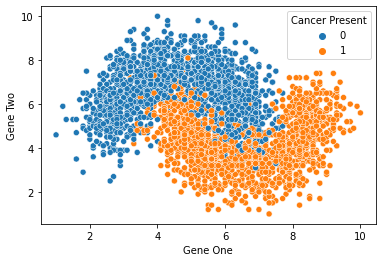

In [2]:
sns.scatterplot(x="Gene One", y = "Gene Two", data = df, hue = "Cancer Present")

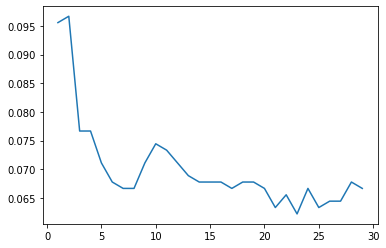

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.drop("Cancer Present", axis=1)
y = df["Cancer Present"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
losses = []
for i in range(1,30):
  model = KNeighborsClassifier(i)
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  losses.append(1-accuracy_score(y_test, preds))
  #plot_confusion_matrix(model, x_test, y_test)
plt.plot(range(1,30), losses)